<a href="https://colab.research.google.com/github/hemantsinghrajput/Cat_Face_detection/blob/main/Heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

#data=pd.read_csv("heartd.csv", sep = ';', encoding = 'latin1', error_bad_lines=False)
data=pd.read_csv("heart_failure_clinical_records_dataset.csv")
print(data.head())
#print(data.describe(include='O').T)
#sns.relplot(data=data,x="Sales of shampoo over a three year period",y="Month",kind="line")
plt.show()




    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [12]:
X=pd.get_dummies(data.drop(columns=['DEATH_EVENT']),drop_first=True)

y=data['DEATH_EVENT']
train_x,test_x,train_y,test_y=train_test_split(X,y, test_size=0.25,random_state=1)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(train_x,train_y)
prediction_tree=clf.predict(test_x)
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_11 <= 73.50
|   |--- feature_8 <= 136.50
|   |   |--- feature_7 <= 0.85
|   |   |   |--- class: 0
|   |   |--- feature_7 >  0.85
|   |   |   |--- feature_7 <= 1.05
|   |   |   |   |--- feature_6 <= 222000.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  222000.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_7 >  1.05
|   |   |   |   |--- class: 1
|   |--- feature_8 >  136.50
|   |   |--- feature_8 <= 139.50
|   |   |   |--- feature_11 <= 11.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_11 >  11.50
|   |   |   |   |--- feature_7 <= 1.09
|   |   |   |   |   |--- feature_4 <= 27.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  27.50
|   |   |   |   |   |   |--- feature_4 <= 36.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  36.50
|   |   |   |   |   |   |   |--- feature_11 <= 47.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- f

In [13]:
#print(clf)
#print(prediction_tree)
confusion_matrix_logr=confusion_matrix(test_y, prediction_tree)
tn,fp,fn,tp=confusion_matrix_logr.ravel()
print(confusion_matrix_logr)
print('tp:',tp,'tn:',tn,'fp:',fp,'fn:',fn)
acc_score_logr=accuracy_score(test_y,prediction_tree)
print(round(acc_score_logr*100,2))
lr_precision=tp/(tp+fp)
lr_recall=tp/(tp+fn)
lr_f1_score=2/(1/lr_precision+1/lr_recall)
print("Precision is:",round(lr_precision*100,2),"Recall is:",round(lr_recall*100,2),"F1 Score is:",round(lr_f1_score*100,2))
print('Misclassified samples: %d' %(test_y!=prediction_tree).sum())

[[49  6]
 [ 8 12]]
tp: 12 tn: 49 fp: 6 fn: 8
81.33
Precision is: 66.67 Recall is: 60.0 F1 Score is: 63.16
Misclassified samples: 14


In [15]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
clf = LogisticRegression()
clf.fit(train_x,train_y)
prediction_tree=clf.predict(test_x)
#text_representation = tree.export_text(clf)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [16]:
confusion_matrix_logr=confusion_matrix(test_y, prediction_tree)
tn,fp,fn,tp=confusion_matrix_logr.ravel()
print(confusion_matrix_logr)
print('tp:',tp,'tn:',tn,'fp:',fp,'fn:',fn)
acc_score_logr=accuracy_score(test_y,prediction_tree)
print(round(acc_score_logr*100,2))
lr_precision=tp/(tp+fp)
lr_recall=tp/(tp+fn)
lr_f1_score=2/(1/lr_precision+1/lr_recall)
print("Precision is:",round(lr_precision*100,2),"Recall is:",round(lr_recall*100,2),"F1 Score is:",round(lr_f1_score*100,2))
print('Misclassified samples: %d' %(test_y!=prediction_tree).sum())

[[52  3]
 [ 7 13]]
tp: 13 tn: 52 fp: 3 fn: 7
86.67
Precision is: 81.25 Recall is: 65.0 F1 Score is: 72.22
Misclassified samples: 10


In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x,train_y)
prediction_tree=gnb.predict(test_x)

In [18]:
confusion_matrix_logr=confusion_matrix(test_y, prediction_tree)
tn,fp,fn,tp=confusion_matrix_logr.ravel()
print(confusion_matrix_logr)
print('tp:',tp,'tn:',tn,'fp:',fp,'fn:',fn)
acc_score_logr=accuracy_score(test_y,prediction_tree)
print(round(acc_score_logr*100,2))
lr_precision=tp/(tp+fp)
lr_recall=tp/(tp+fn)
lr_f1_score=2/(1/lr_precision+1/lr_recall)
print("Precision is:",round(lr_precision*100,2),"Recall is:",round(lr_recall*100,2),"F1 Score is:",round(lr_f1_score*100,2))
print('Misclassified samples: %d' %(test_y!=prediction_tree).sum())

[[54  1]
 [10 10]]
tp: 10 tn: 54 fp: 1 fn: 10
85.33
Precision is: 90.91 Recall is: 50.0 F1 Score is: 64.52
Misclassified samples: 11


In [26]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(train_x,train_y)
prediction_tree=classifier.predict(test_x)

In [25]:
confusion_matrix_logr=confusion_matrix(test_y, prediction_tree)
tn,fp,fn,tp=confusion_matrix_logr.ravel()
print(confusion_matrix_logr)
print('tp:',tp,'tn:',tn,'fp:',fp,'fn:',fn)
acc_score_logr=accuracy_score(test_y,prediction_tree)
print(round(acc_score_logr*100,2))
lr_precision=tp/(tp+fp)
lr_recall=tp/(tp+fn)
lr_f1_score=2/(1/lr_precision+1/lr_recall)
print("Precision is:",round(lr_precision*100,2),"Recall is:",round(lr_recall*100,2),"F1 Score is:",round(lr_f1_score*100,2))
print('Misclassified samples: %d' %(test_y!=prediction_tree).sum())

[[41 14]
 [18  2]]
tp: 2 tn: 41 fp: 14 fn: 18
57.33
Precision is: 12.5 Recall is: 10.0 F1 Score is: 11.11
Misclassified samples: 32


In [27]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear')
clf.fit(train_x,train_y)
prediction_tree=clf.predict(test_x)

In [28]:
confusion_matrix_logr=confusion_matrix(test_y, prediction_tree)
tn,fp,fn,tp=confusion_matrix_logr.ravel()
print(confusion_matrix_logr)
print('tp:',tp,'tn:',tn,'fp:',fp,'fn:',fn)
acc_score_logr=accuracy_score(test_y,prediction_tree)
print(round(acc_score_logr*100,2))
lr_precision=tp/(tp+fp)
lr_recall=tp/(tp+fn)
lr_f1_score=2/(1/lr_precision+1/lr_recall)
print("Precision is:",round(lr_precision*100,2),"Recall is:",round(lr_recall*100,2),"F1 Score is:",round(lr_f1_score*100,2))
print('Misclassified samples: %d' %(test_y!=prediction_tree).sum())

[[49  6]
 [11  9]]
tp: 9 tn: 49 fp: 6 fn: 11
77.33
Precision is: 60.0 Recall is: 45.0 F1 Score is: 51.43
Misclassified samples: 17


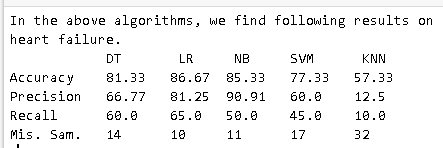

In the above table,LR(Logistic Regression) algorithm is working well on the dataset.So we choose LR for prediction.
